In [77]:
import matplotlib.pyplot as plt
from pathlib import Path

In [78]:
class Dummy_obj:
    def __init__(self, onnx, vnnlib, n_splits, ot, st, bt, res_o, res_s, res_b):
        self.onnx, self.vnnlib, self.n_splits = onnx, vnnlib, int(n_splits)
        self.ot, self.st, self.bt = float(ot), float(st), float(bt)
        self.res_o, self.res_s, self.res_b = res_o, res_s, res_b

In [105]:
def load_csv(file):
    with open(file) as f:
        f.readline()
        rows = []
        skipped = []
        for l in f:
#             onnx,vnnlib,strategy,mask,n_splits,original_r,original_t,splitted_r,splitted_t,baseline_r,baseline_t
            fileds = l.split(',')
            assert len(fileds)==11
            if fileds[4] == "SKIPPED":
                skipped.append( Dummy_obj(fileds[0], fileds[1], -1, -1, -1, -1, -1, -1, -1) )
                continue
            rows.append( Dummy_obj(fileds[0], fileds[1], fileds[4], 
                                   fileds[6], fileds[8], fileds[10], 
                                   fileds[5], fileds[7], fileds[9]) )
    return (file.stem, rows, skipped)
            

In [106]:
exp1_path = Path("/Users/linhan/relusplitter/experiment/results/exp1")

In [107]:
results = []
for f in exp1_path.iterdir():
    if f.suffix != ".csv":
        continue
    results.append(load_csv(f))
    
    

In [108]:
def exp1_graphing(result, filter_fn = None):
    title, instances, skipped_instances = result
    
    if filter_fn != None:
        filtered_instances = [i for i in instances if not filter_fn(i)]
        instances = [i for i in instances if filter_fn(i)]
        print(f"filted {len(filtered_instances)}, remaining: {len(instances)}")
        
    
    onnx_labels = list(sorted(set(dp.onnx for dp in instances)))
    onnx_map = {label: idx for idx, label in enumerate(onnx_labels)}
    instances.sort(key=lambda x: x.onnx)
    offset = 0.1
    
    ys_ot = [onnx_map[dp.onnx] for dp in instances]  # Y-values mapped to numeric indices
    ys_st = [y+offset for y in ys_ot]
    ys_bt = [y+offset for y in ys_st]
    ot = [dp.ot for dp in instances]
    st = [dp.st for dp in instances]  # ST values
    bt = [dp.bt for dp in instances]  # BT values
    
    plt.figure(figsize=(20,9))

    plt.scatter(ys_ot, ot, color="green", label="Original Instances")
    plt.scatter(ys_bt, bt, color="cyan", label="Baseline Instances")
    plt.scatter(ys_st, st, color="red", label="Splitted Instances")
    plt.legend()
    
    plt.plot([ys_ot, ys_bt], [ot, bt], linestyle='--', color='gray', linewidth=0.5)
    plt.plot([ys_ot, ys_st], [ot, st], linestyle='--', color='gray', linewidth=0.5)
    plt.plot([ys_bt, ys_st], [bt, st], linestyle='--', color='gray', linewidth=0.5)
    
    
    plt.title(title)
    plt.show()

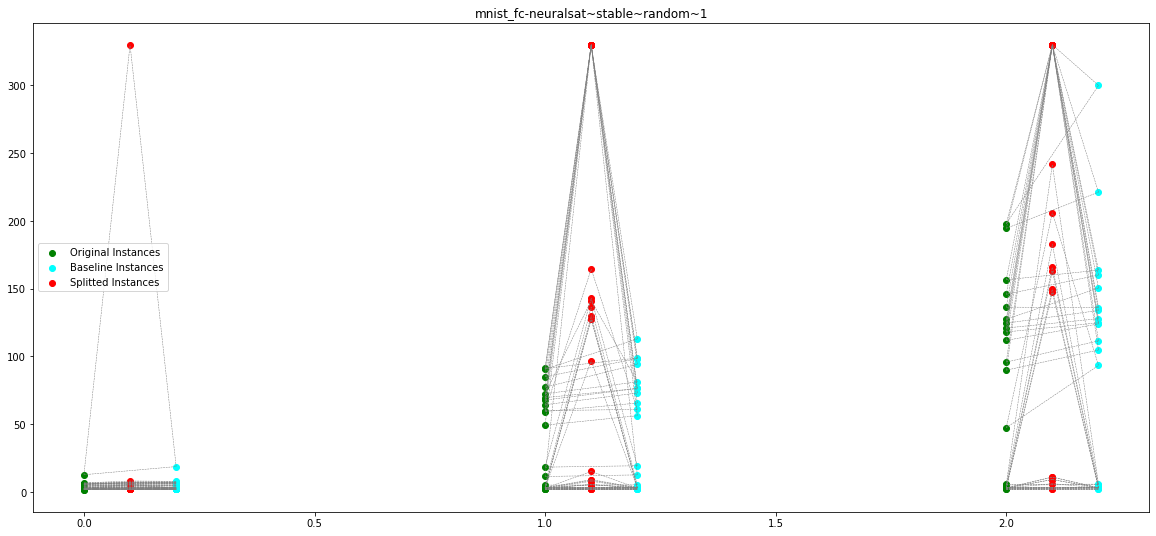

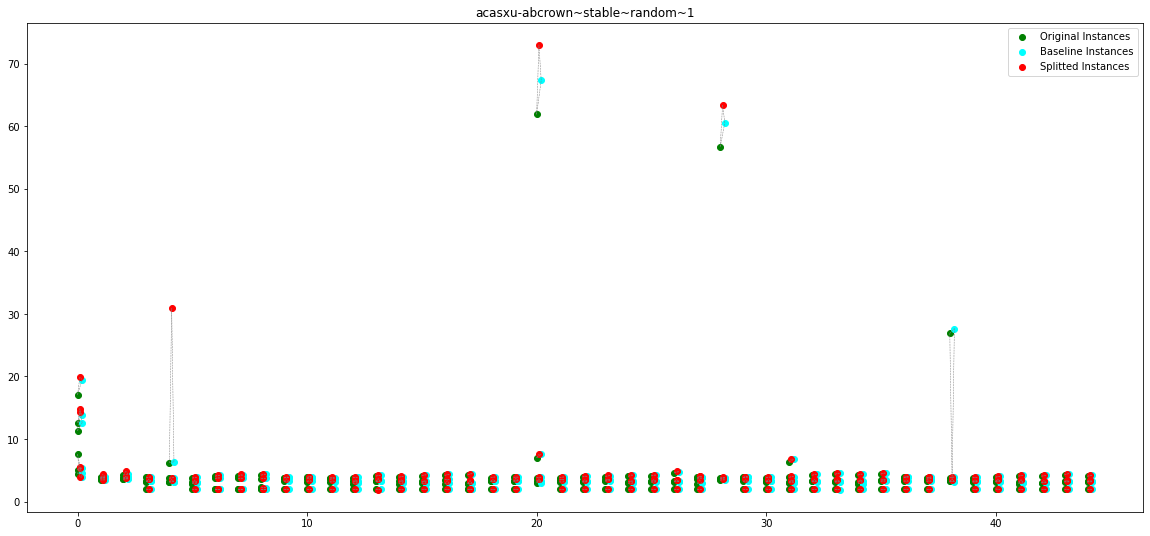

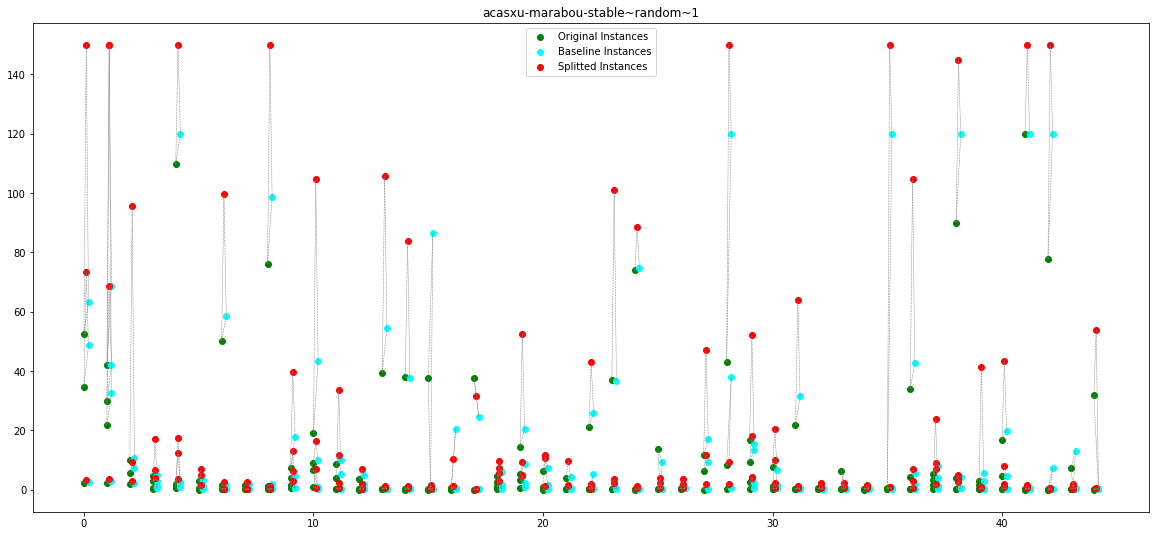

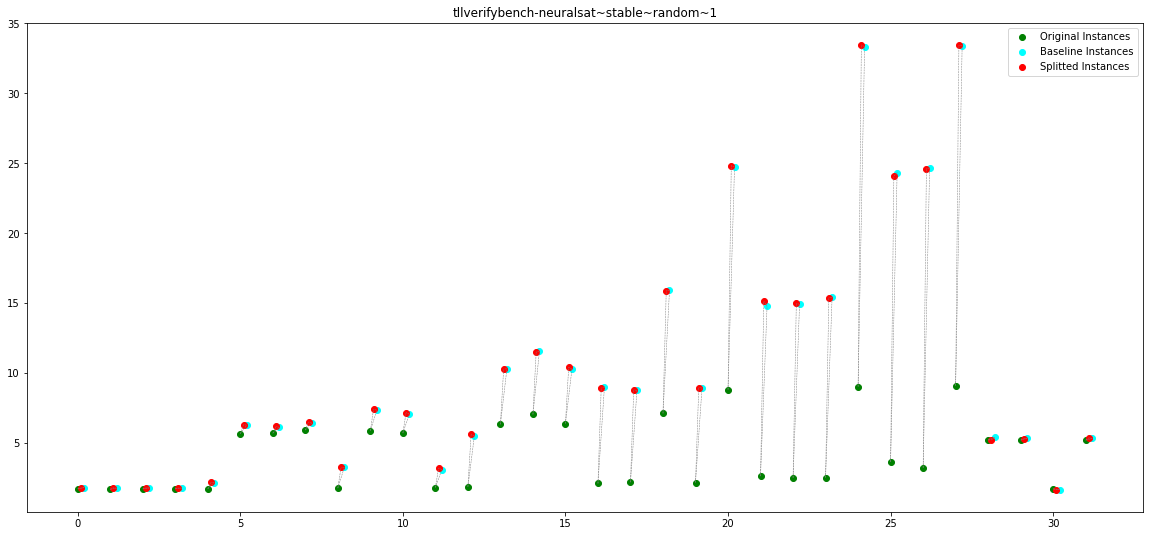

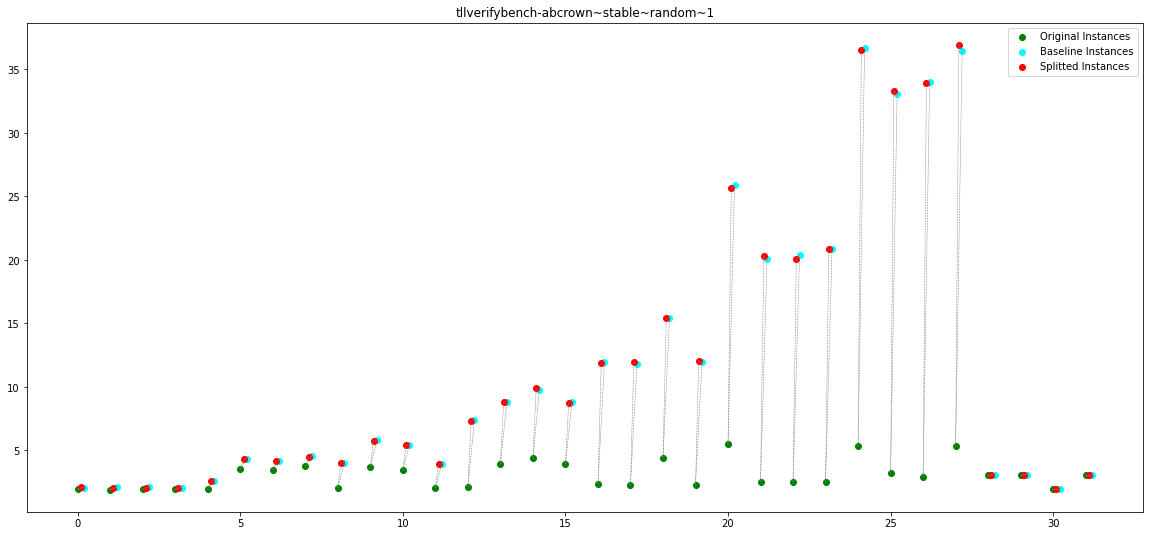

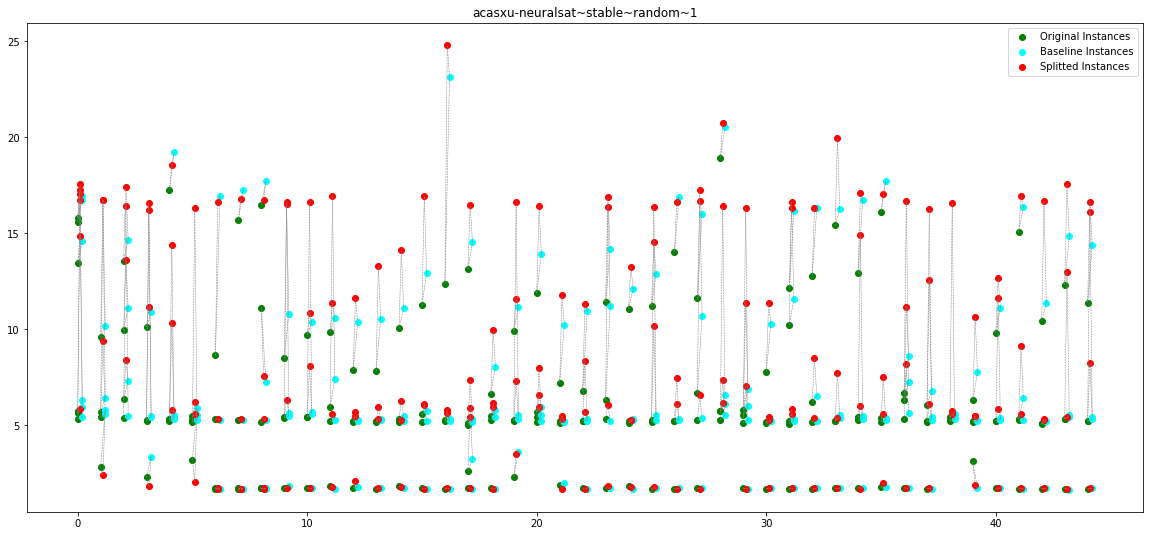

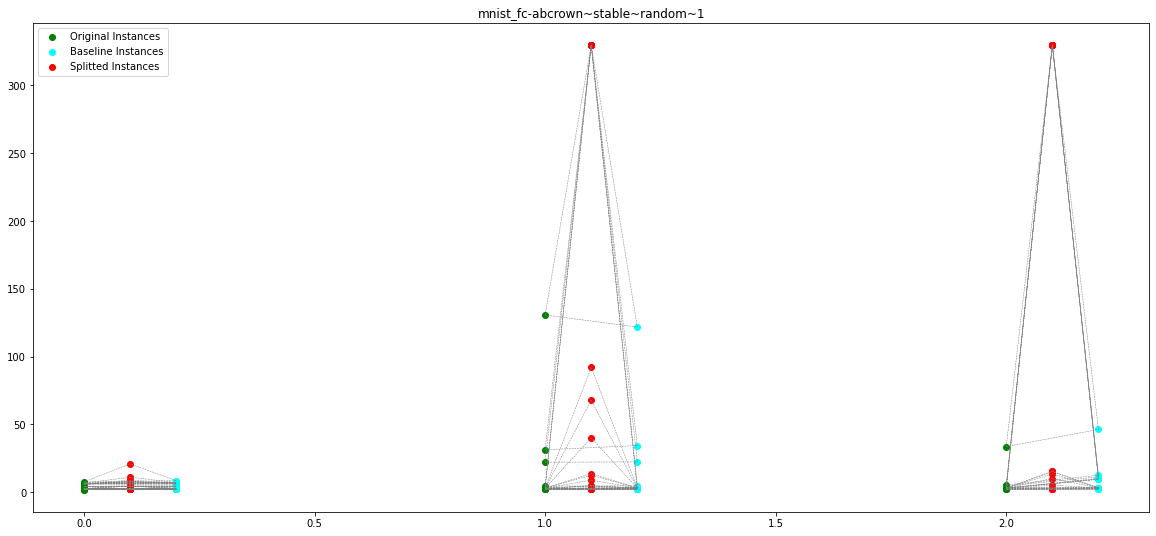

In [109]:
for r in results:
    exp1_graphing(r)

filted 17, remaining: 68


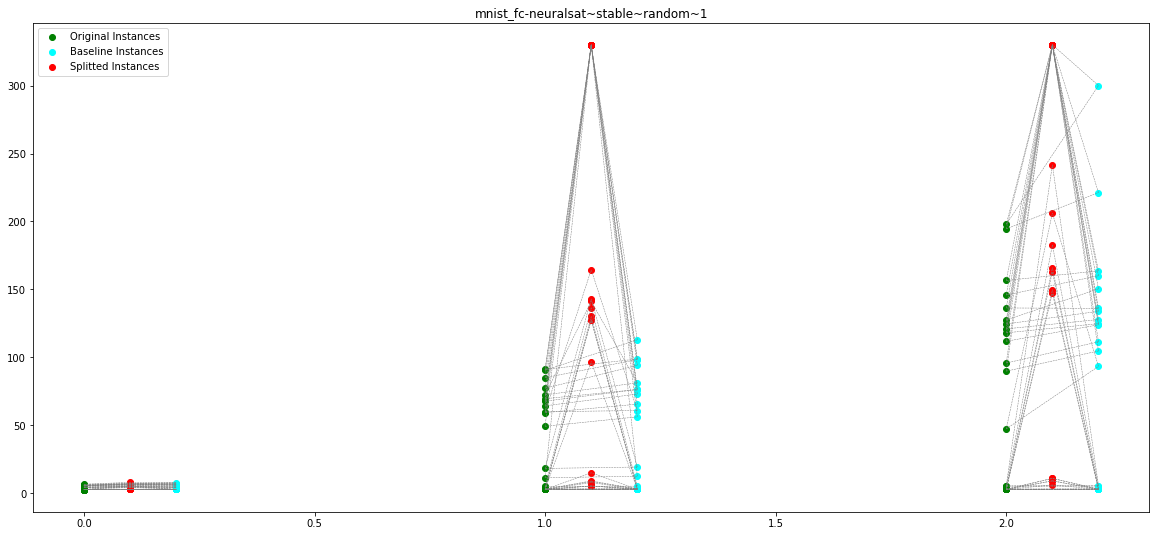

filted 47, remaining: 139


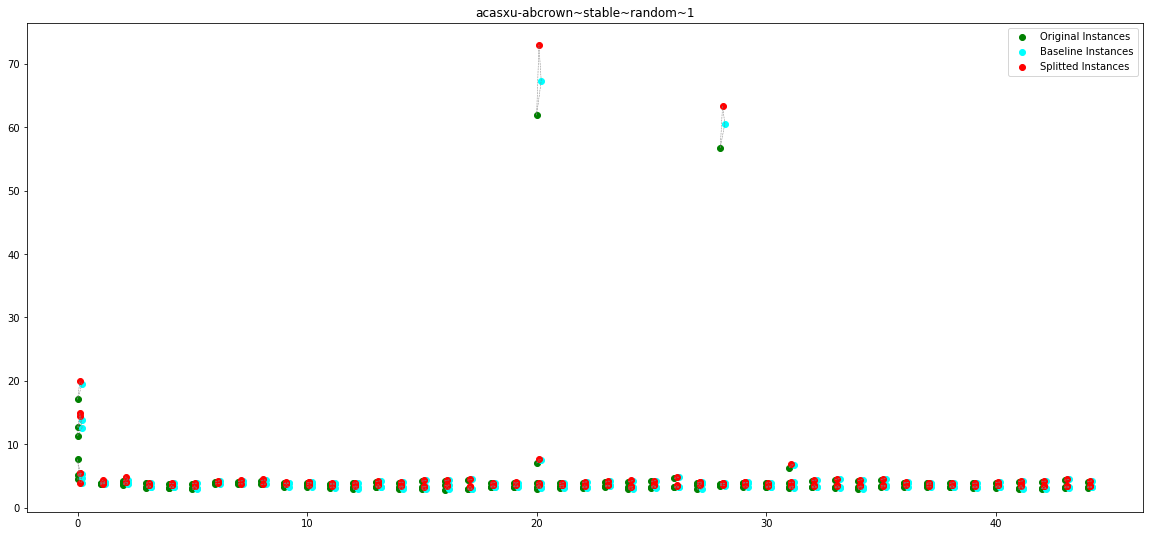

filted 43, remaining: 116


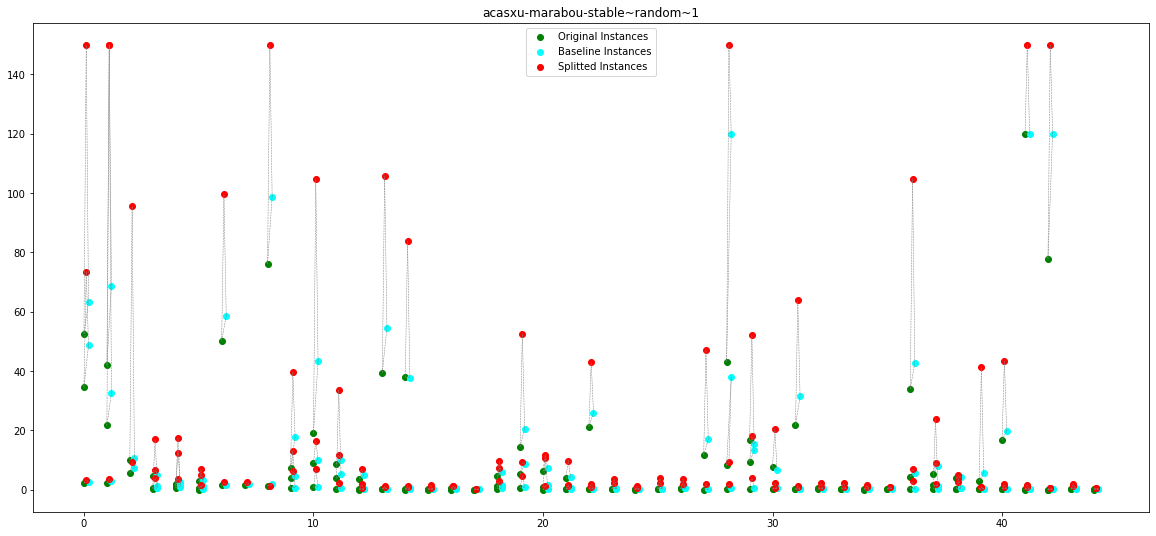

filted 17, remaining: 15


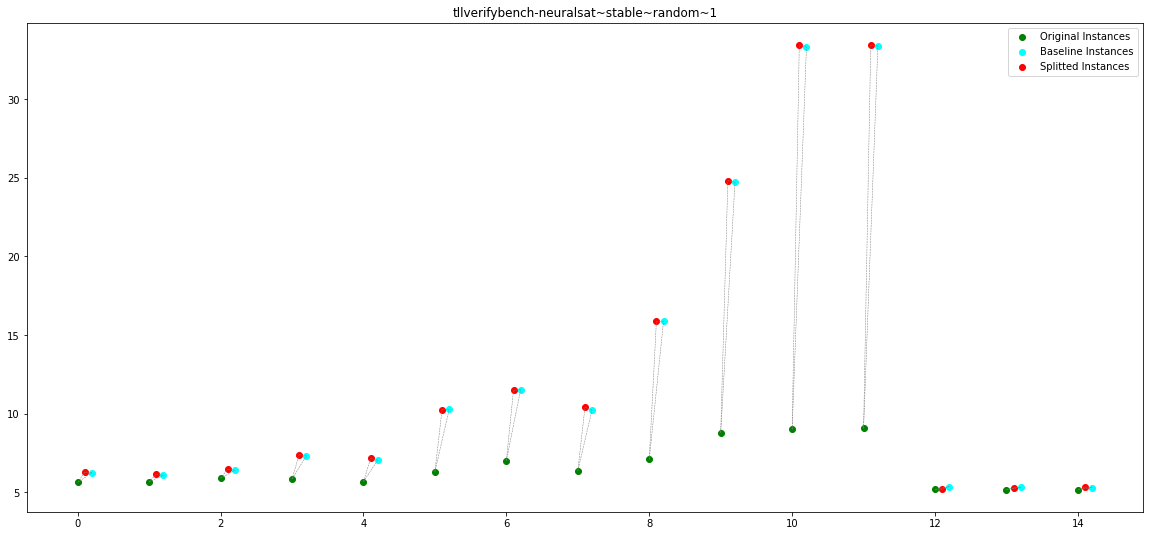

filted 17, remaining: 15


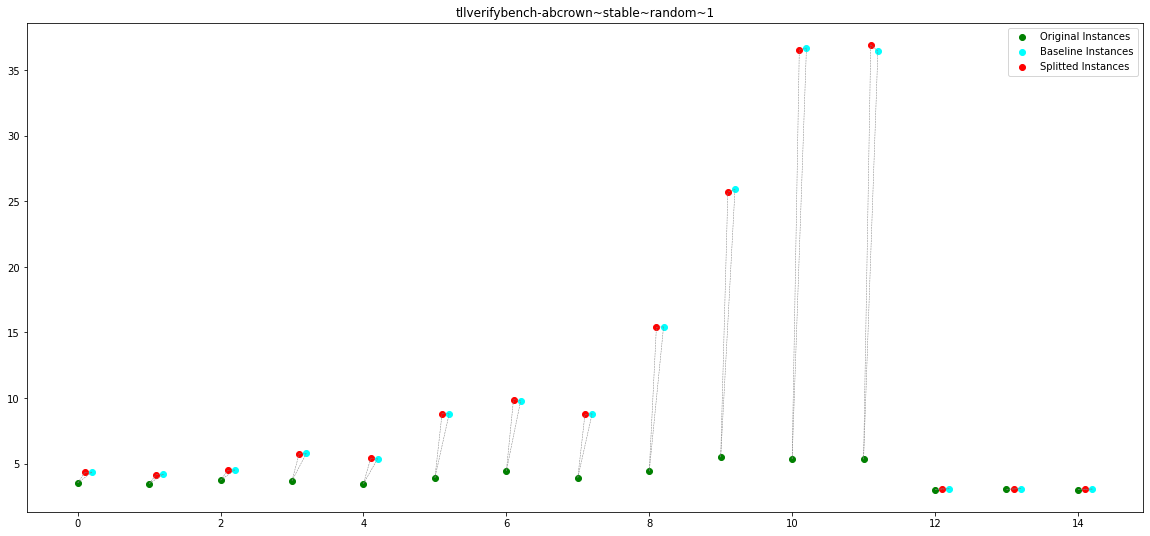

filted 46, remaining: 138


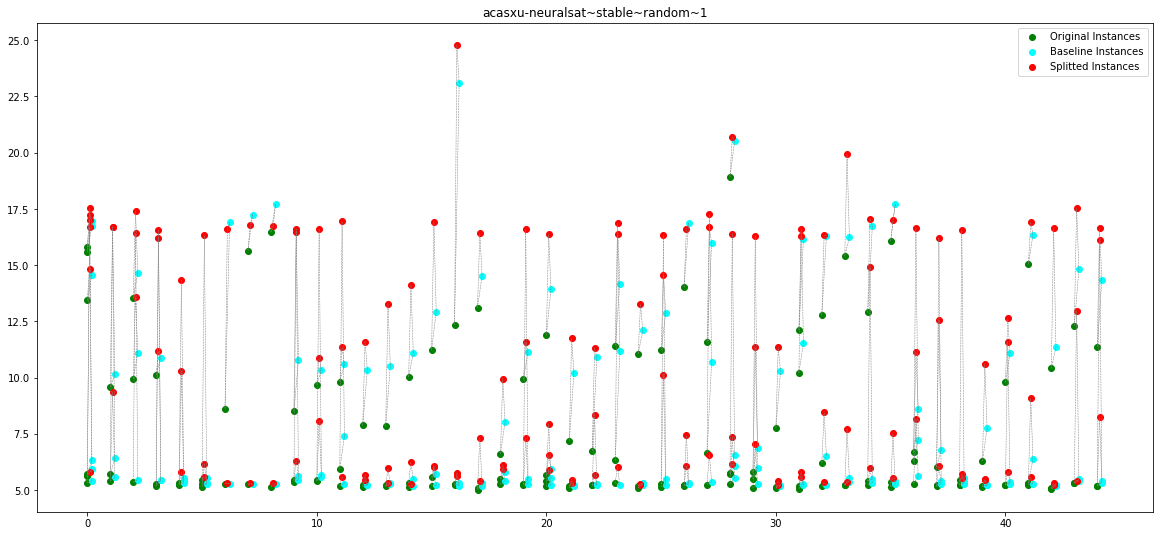

filted 18, remaining: 46


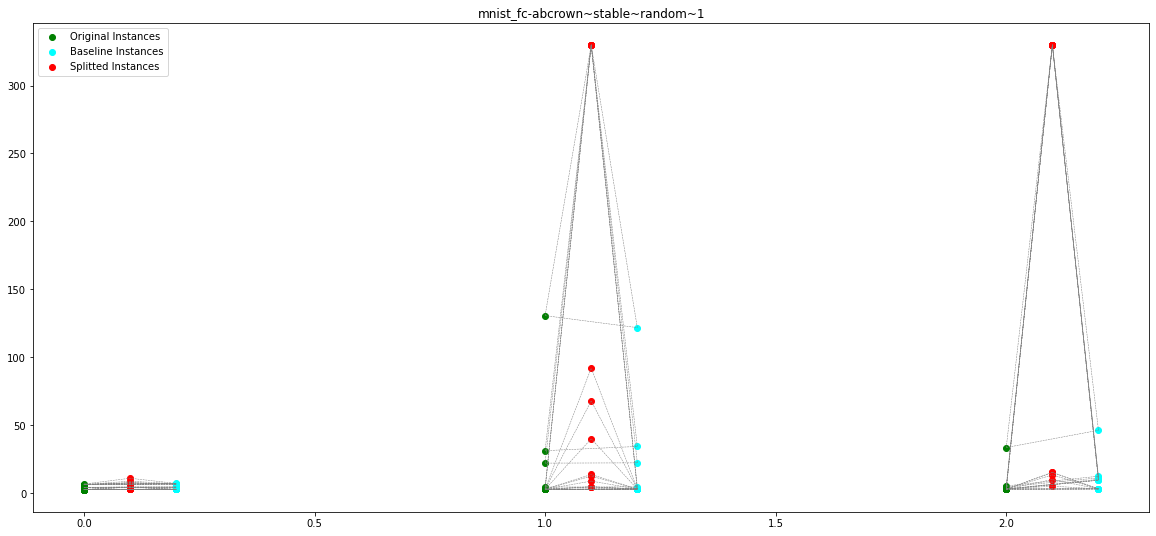

In [110]:
for r in results:
    exp1_graphing(r, lambda x: x.res_o == "unsat")

filted 68, remaining: 17


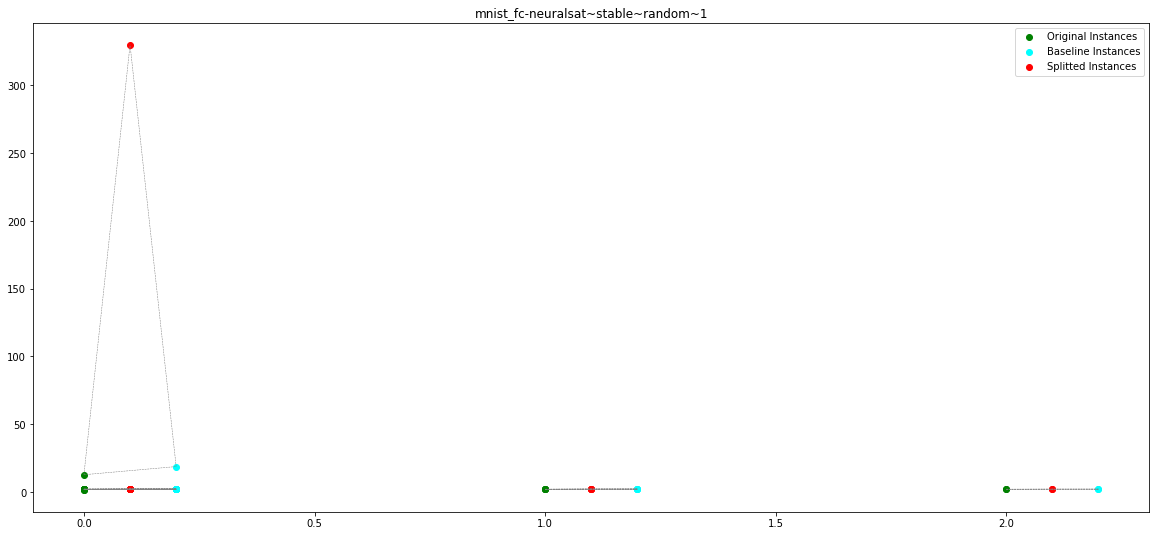

filted 139, remaining: 47


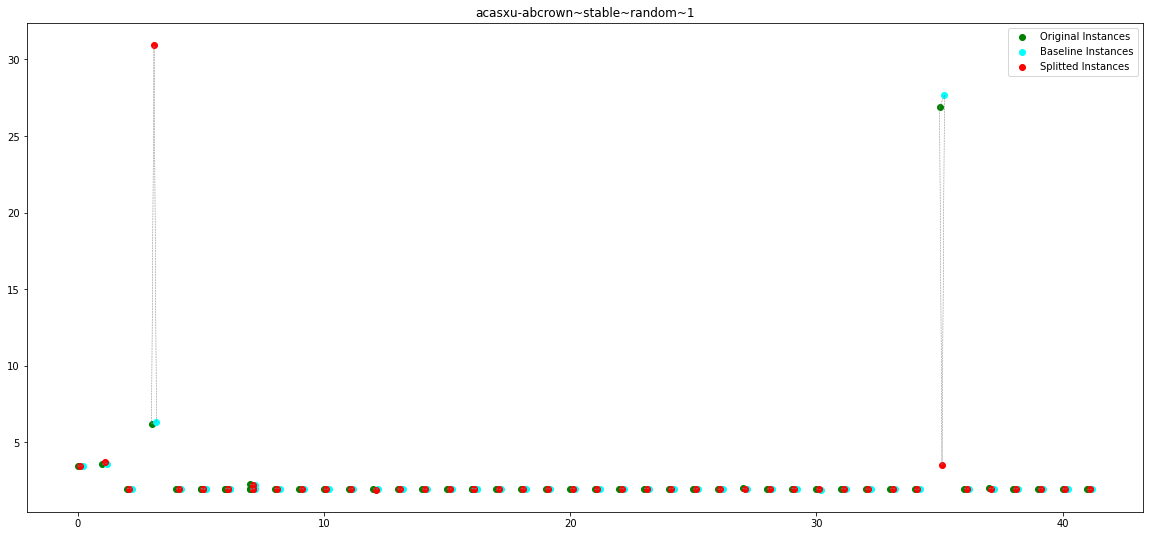

filted 116, remaining: 43


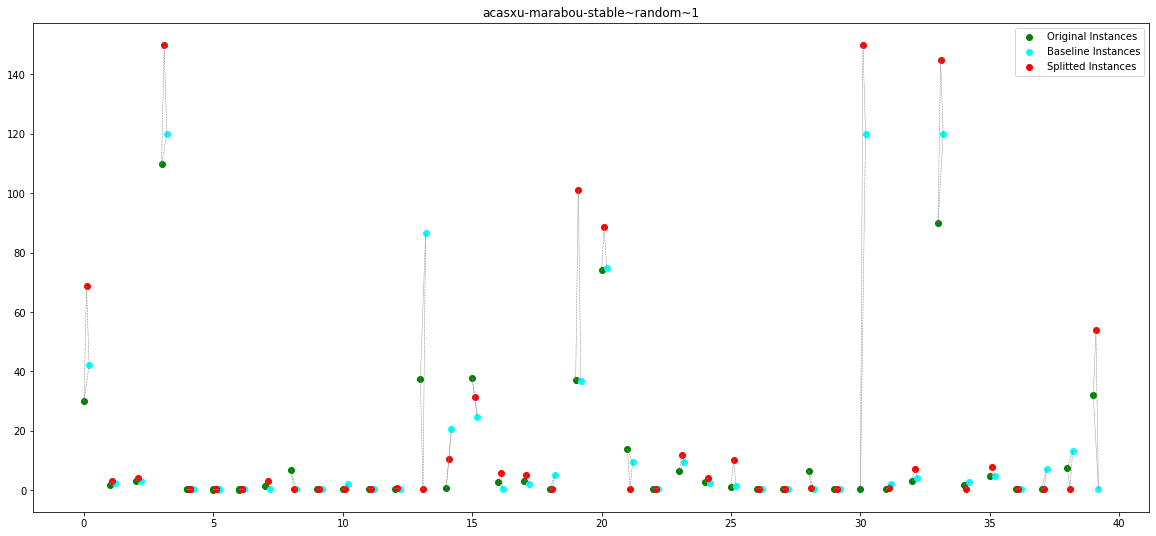

filted 15, remaining: 17


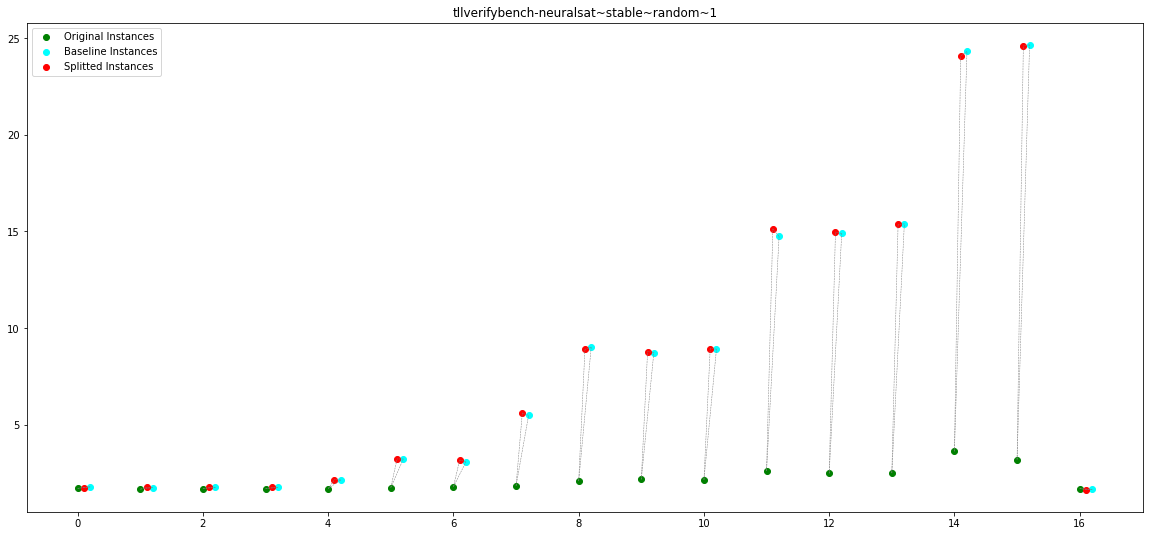

filted 15, remaining: 17


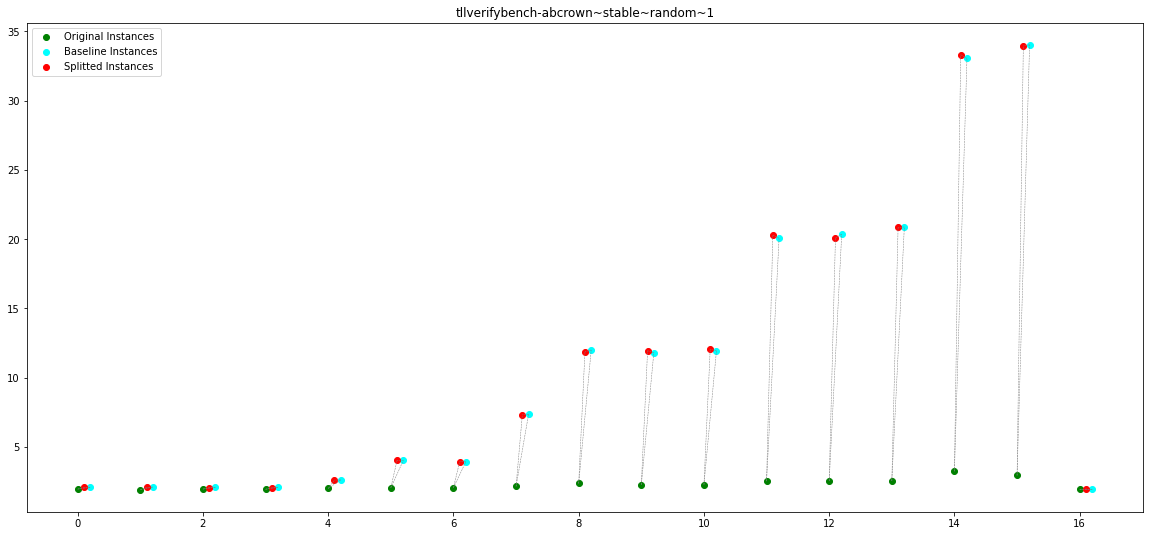

filted 138, remaining: 46


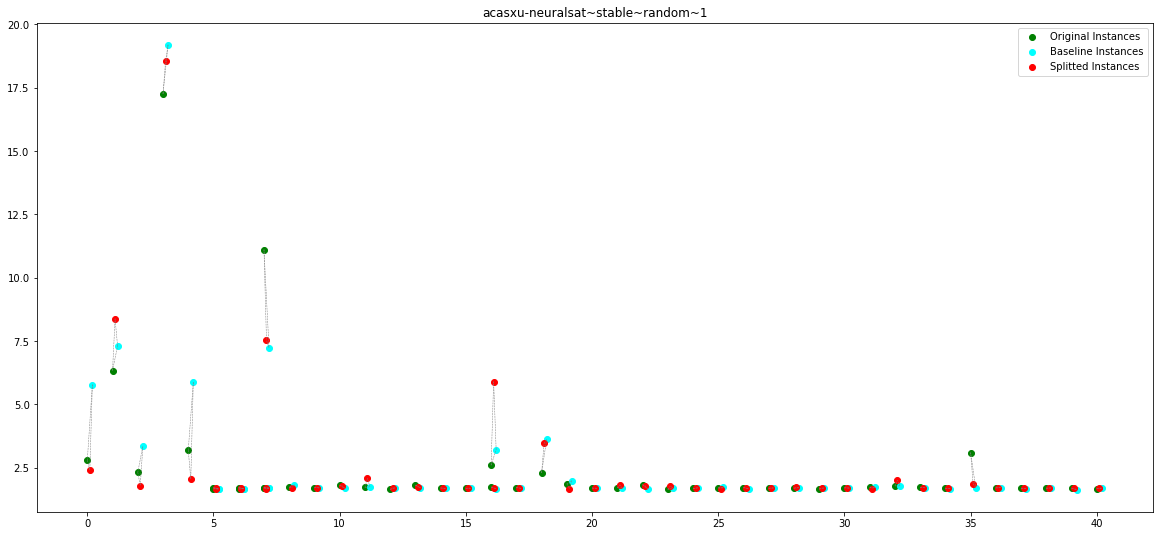

filted 46, remaining: 18


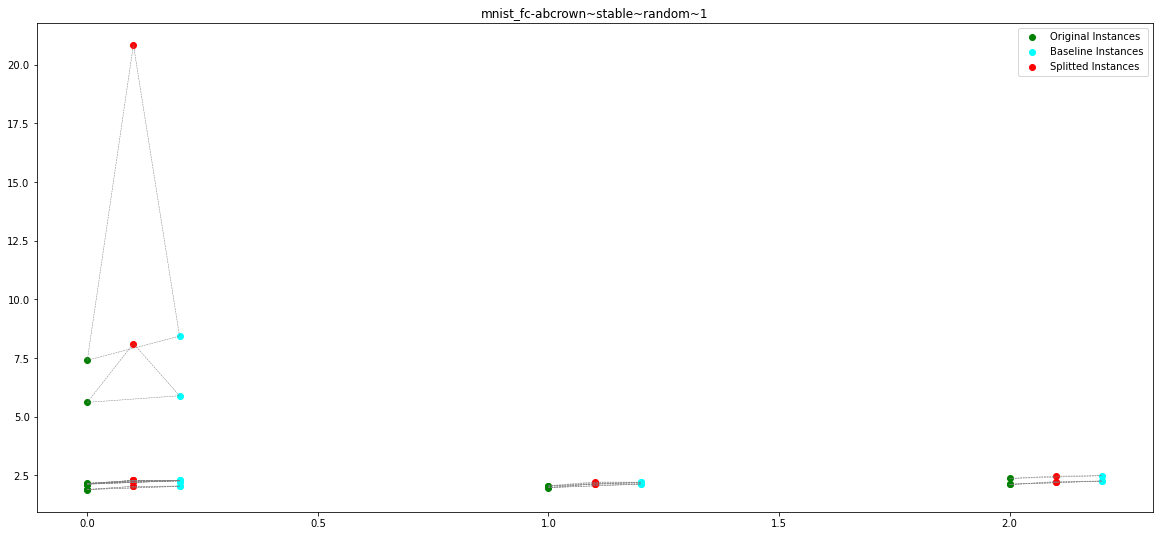

In [111]:
for r in results:
    exp1_graphing(r, lambda x: x.res_o == "sat")